<a href="https://colab.research.google.com/github/SachinScaler/Oct24HypothesisTesting/blob/main/Feature_Engineering_1%7CLecture.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Loan Status Example:

**GOAL:** Given a set of attributes of a person, Build a Model to predict if the Loan Request should be Accepted or Rejected

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [8]:
# read dataset
#!gdown 15B0YXLJhx41faA2rVyifWMjlmpuFqAxc # manually download

# from git
data = pd.read_csv('https://raw.githubusercontent.com/SachinScaler/Oct24HypothesisTesting/refs/heads/main/loan.csv')
data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [9]:
data.shape

(614, 13)

data dictionary:

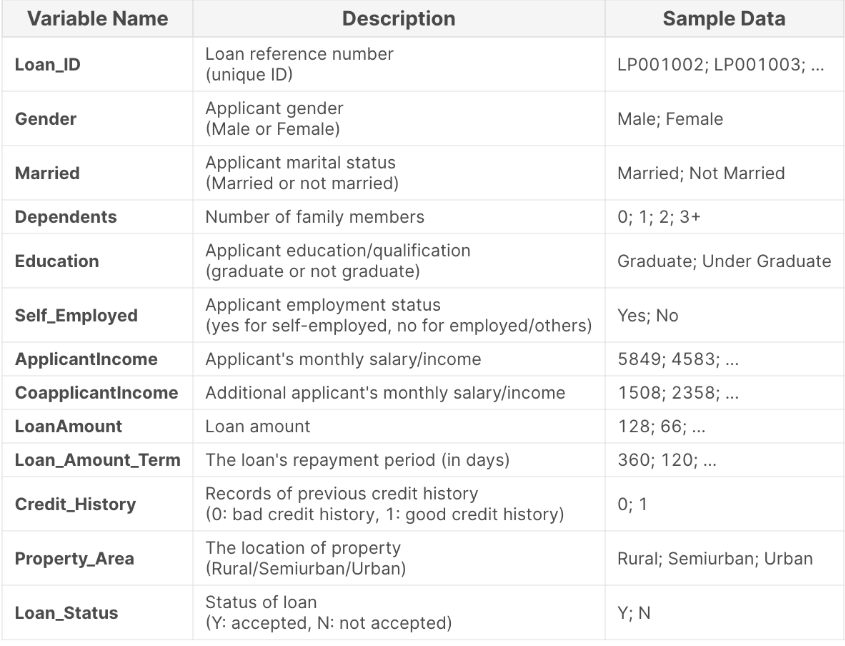

### Features(Gender, Salary ....) ---> MLModel ---> Target(loan_status)

In [10]:
data.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

**Features:** 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area'

**Target:** Loan_Status

#### Let's quickly check dtypes

In [11]:
data.dtypes

,0
Loan_ID,object
Gender,object
Married,object
Dependents,object
Education,object
Self_Employed,object
ApplicantIncome,int64
CoapplicantIncome,float64
LoanAmount,float64
Loan_Amount_Term,float64


Let's check info of dataset

In [12]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


The "Dependents" feature should ideally be an integer, as it represents counts such as 0, 1, 2, etc.

However, it is currently labelled as an "Object" datatype.


Let's explore what is wrong here

In [13]:
data["Dependents"].value_counts()

,count
Dependents,
0,345
1,102
2,101
3+,51


**Q:** Will loanID be useful in predicting the loan_status?

In [14]:
data = data.drop('Loan_ID', axis=1)
data.shape

(614, 12)

Let's continue EDA and Describe the data

In [16]:
data.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


NOTE: `If we don't pass any special arguments in the describe it'll only return statistics for the numeric features.`

Based on the summary statistics for the numerical columns in the dataset we can observe that:

- The income varies significantly, with the lowest income being `$150`, and the highest being `$81,000`.
The majority of applicants have incomes below `$6,000` (75th percentile).

- Co-applicant incomes range from `$0` to `$41,667`.

- A significant portion of coapplicants has no income (25th percentile).

- The mean loan amount requested is approximately `$146 (Thousands)`, indicating that, on average, applicants seek loans of this amount.

- The majority of loan terms are for 360 months (30 years).
The minimum loan term is 12 months, and the maximum is 480 months.

Now, If you look at "ApplicantIncome" the max is 81000 So by looking into this we can say that this data right skewed.

let's check description of non numerical columns now:

In [17]:
data.describe(include = ['object'])

,Gender,Married,Dependents,Education,Self_Employed,Property_Area,Loan_Status
count,601,611,599,614,582,614,614
unique,2,2,4,2,2,3,2
top,Male,Yes,0,Graduate,No,Semiurban,Y
freq,489,398,345,480,500,233,422


Based on the above summary statistics we can observe that:

- Male applicants significantly outnumber female applicants in the dataset.
- A significant proportion of applicants are married (398 out of 611).
- Married applicants are prevalent in the dataset.
- A substantial portion of applicants has no dependents.
- Graduates make up a significant portion of the applicant pool.
- Non-self-employed individuals dominate the dataset.
- A significant number of applicants are from semiurban areas.
- The majority of applicants have their loans approved.

Let's check for any null values present


In [20]:
data.isna().sum()/data.shape[0]*100

,0
Gender,2.117264
Married,0.488599
Dependents,2.442997
Education,0.000000
Self_Employed,5.211726
ApplicantIncome,0.000000
CoapplicantIncome,0.000000
LoanAmount,3.583062
Loan_Amount_Term,2.280130
Credit_History,8.143322


In [21]:
data.isna().sum()

,0
Gender,13
Married,3
Dependents,15
Education,0
Self_Employed,32
ApplicantIncome,0
CoapplicantIncome,0
LoanAmount,22
Loan_Amount_Term,14
Credit_History,50


Few Null Values

For simplicity, let's store Categorical and Numerical Features seperately:

In [22]:
num_cols = data.dtypes != 'object'
num_cols

,0
Gender,False
Married,False
Dependents,False
Education,False
Self_Employed,False
ApplicantIncome,True
CoapplicantIncome,True
LoanAmount,True
Loan_Amount_Term,True
Credit_History,True


In [31]:
nums_cols = list(num_cols[num_cols].index)
nums_cols

['ApplicantIncome',
 'CoapplicantIncome',
 'LoanAmount',
 'Loan_Amount_Term',
 'Credit_History']

In [26]:
cat_cols = data.dtypes == 'object'
cat_cols
cat_cols = list(cat_cols[cat_cols].index)
cat_cols

['Gender',
 'Married',
 'Dependents',
 'Education',
 'Self_Employed',
 'Property_Area',
 'Loan_Status']

Now in "cat_cols" you can see 'Loan_Status' is also there but as we know 'Loan_Status' is a Target so let's remove it from features.



In [27]:
cat_cols.remove('Loan_Status')
cat_cols

['Gender',
 'Married',
 'Dependents',
 'Education',
 'Self_Employed',
 'Property_Area']

### Let's Deep Dive into Skewness of Numerical Cols

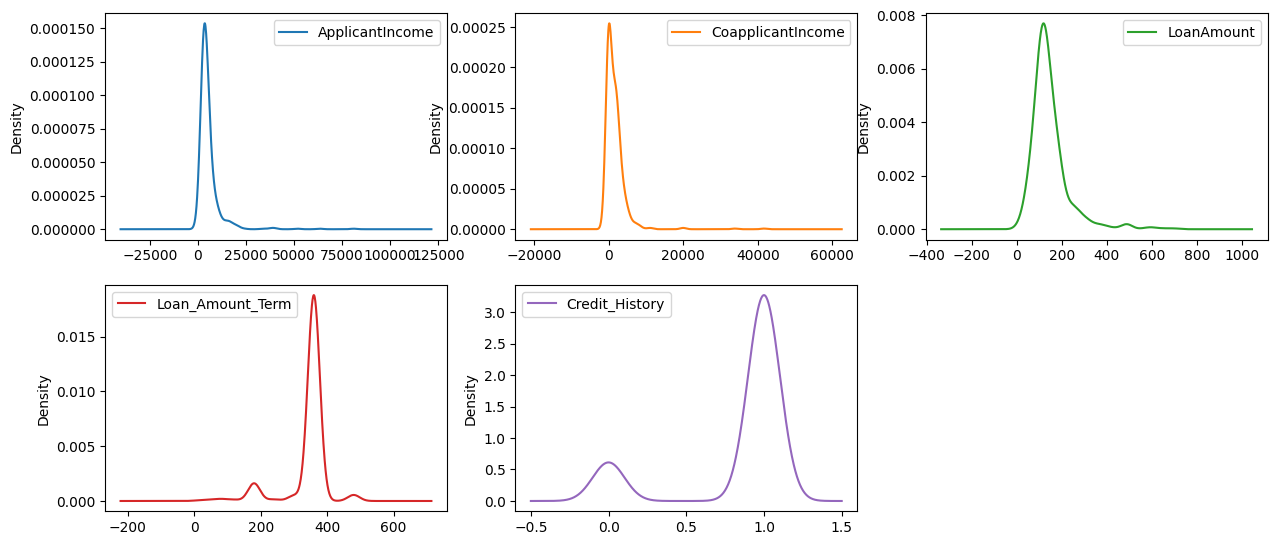

In [28]:
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = [15,10]
data.plot(kind = 'density', subplots = True, layout = (3,3), sharex = False)
plt.show()

reference: https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.plot.html

In [29]:
data.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [33]:
data[nums_cols].skew()

,0
ApplicantIncome,6.539513
CoapplicantIncome,7.491531
LoanAmount,2.677552
Loan_Amount_Term,-2.362414
Credit_History,-1.882361


Positive
1. **Applicant Income and Coapplicant Income:** Positive skewness indicates lower incomes for many applicants and co-applicants, with a few having exceptionally high incomes.
2. **Loan Amount:** Loan amount also has positive skewness. Most loans are smaller, but there are a few that are much larger.

Negative

3. **Loan Amount Term:** This feature has negative skewness. It indicates that most loan terms are longer (possibly a standard term), but there might be a few shorter-term loans.
4. **Credit History:** Credit history has negative skewness, suggesting that most applicants have a positive credit history (1), but there might be a few with a negative credit history (0).

### Kurtosis

In [34]:
data[nums_cols].kurt()

,0
ApplicantIncome,60.540676
CoapplicantIncome,84.956384
LoanAmount,10.401533
Loan_Amount_Term,6.673474
Credit_History,1.548763


1. **Applicant and Coapplicant:** Very high positive kurtosis means these distributions have heavy tails with some extreme values—indicating a few individuals with much higher incomes than the rest.
2. **Loan Amount and Total Income:** Positive kurtosis suggests heavy tails with some significantly higher values than the center.
3. **Loan Amount Term and Able to Pay EMI:** Positive kurtosis implies a concentration of data around the mean but with some values noticeably different.
4. **Credit History:** Positive kurtosis suggests a distribution with heavy tails, indicating a few applicants with a very different credit history.
5. **Loan Amount per Year and EMI** Extremely high positive kurtosis means their distributions have extremely heavy tails with values much higher than the center.

### Let's do some Univariate Analyis now

In [35]:
### start with loan status
target = 'Loan_Status'
data[target].value_counts()

,count
Loan_Status,
Y,422
N,192


The above plot indicates that a majority of loan applicants have been approved for loans ("Y") in the dataset, with 422 instances.



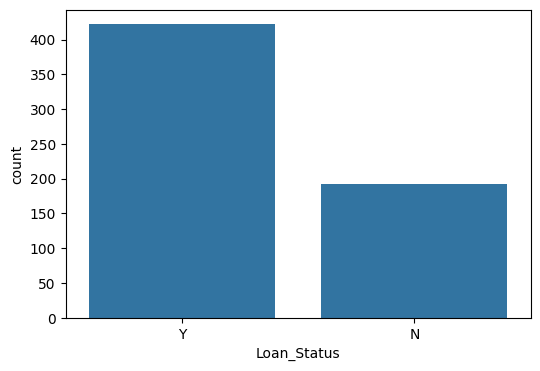

In [36]:
plt.rcParams["figure.figsize"] = [6,4]
sns.countplot(data=data, x='Loan_Status')
plt.show()

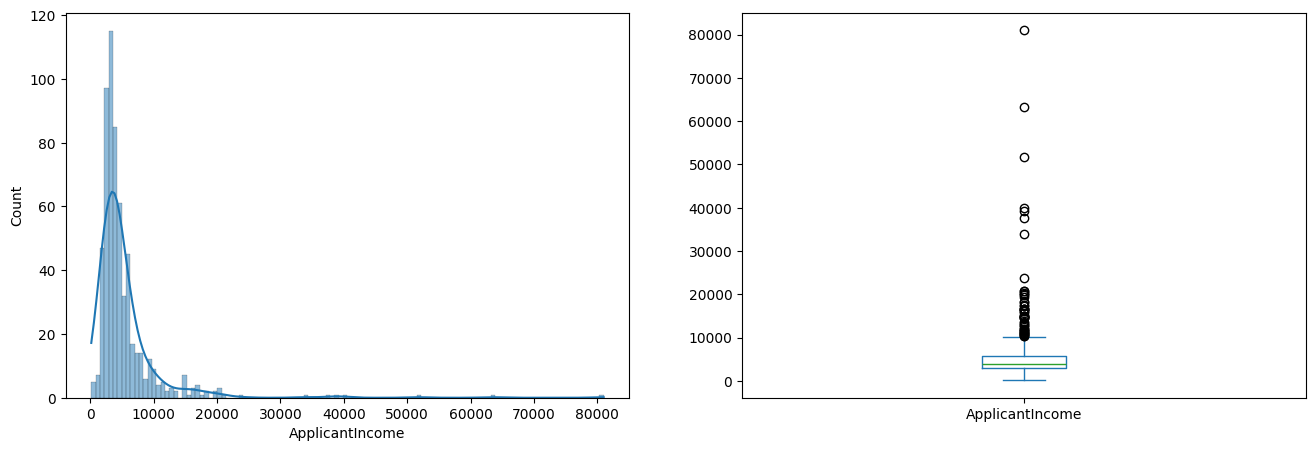

In [37]:
plt.subplot(121)
sns.histplot(data["ApplicantIncome"], kde=True)

plt.subplot(122)
data["ApplicantIncome"].plot.box(figsize=(16,5))
plt.show()


- The histogram indicates right skewness, suggesting some individuals earn significantly more than others.
- Most of the applicant income data is concentrated on the left side, indicating a non-normal distribution.
- The box plot reveals numerous outliers, likely due to income disparity in society.

Let's calculate the mean of "ApplicantIncome" and group it by the "Loan_Status" column.

In [38]:
data.groupby(target)['ApplicantIncome'].mean()

,ApplicantIncome
Loan_Status,
N,5446.078125
Y,5384.068720


**Observations**
The average income for applicants whose loans were rejected (N) is higher than for those whose loans were accepted (Y).

Isn't it counterintuitive, what went wrong here?

`It contradicts the expectation that those with higher incomes would have a higher likelihood of loan approval.`


Let's delve into more fundamental aspects of the data:

"Is the mean statistically significant or not"

To assess the significance of the mean income, we can utilize the ttest_ind function to perform **paired t-test**.

In [39]:
from scipy.stats import ttest_ind

a = data[data["Loan_Status"]=="Y"]["ApplicantIncome"]
b = data[data["Loan_Status"]=="N"]["ApplicantIncome"]

# H0: Income and Loan status are independent
# Ha: Dependent
ttest_ind(a, b)

TtestResult(statistic=-0.11650844828724542, pvalue=0.907287812130518, df=612.0)

Based on the high p-value, we can conclude that there's no significant relationship between loan status and income.


**Remember Binning?**
Another approach could involve categorizing numerical data into groups or bins. This can help analyze complex data with various values and categories more effectively.

- Binning involves organizing data into groups, which helps simplify complex information, like a wide range of income values.
- By grouping incomes into categories or bins, we can identify patterns and trends more easily.
    - For example, we can see how many people fall into different income ranges, making the data more interpretable, especially for non-specialists.
    - Bins also facilitate comparisons between groups, allowing us to analyze low, medium, and high-income categories without focusing on individual numbers.

In [40]:
bins=[0,2500,4000,6000, 8000, 10000, 20000, 40000, 81000]
group=['Low', 'Average', 'Medium', 'H1', 'H2', 'H3', 'H4', 'Very High']

data['Income_bin']= pd.cut(data['ApplicantIncome'],bins,labels=group)
data['Income_bin'].value_counts()

,count
Income_bin,
Average,226
Medium,143
Low,108
H1,54
H3,40
H2,31
H4,9
Very High,3


In [41]:
data['Loan_Status'].value_counts()

,count
Loan_Status,
Y,422
N,192


To compare the "Income_bin" and "Loan_Status" columns, we can utilize the pd.crosstab() function.



In [42]:
pd.crosstab(data["Income_bin"],data["Loan_Status"])

Loan_Status,N,Y
Income_bin,,
Low,34,74
Average,67,159
Medium,45,98
H1,20,34
H2,9,22
H3,13,27
H4,3,6
Very High,1,2


Let's turn these income groups into a plot to make it even easier to understand.

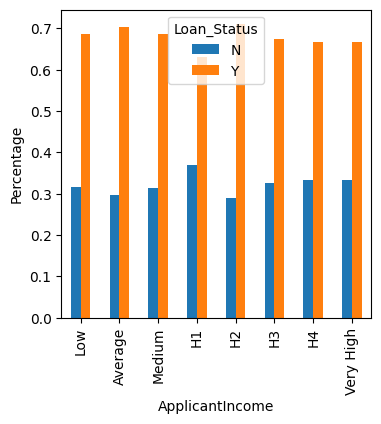

In [43]:
Income_bin = pd.crosstab(data["Income_bin"],data["Loan_Status"], normalize="index")
Income_bin.plot(kind="bar",figsize=(4,4))
plt.xlabel("ApplicantIncome")
plt.ylabel("Percentage")
plt.show()

It can be inferred that the Applicant income does not affect the chances of loan approval.

We can see that all the bins have almost the same acceptance rate and now we can say that this is more significant.

Can we use any test here to check the independence of loan_status vs Income_bins?



In [44]:
from scipy.stats import chi2_contingency

In [46]:
Income_bin = pd.crosstab(data["Income_bin"],data["Loan_Status"])
Income_bin.values


array([[ 34,  74],
       [ 67, 159],
       [ 45,  98],
       [ 20,  34],
       [  9,  22],
       [ 13,  27],
       [  3,   6],
       [  1,   2]])

In [47]:
chi2_contingency(Income_bin.values)

Chi2ContingencyResult(statistic=1.2420001711303135, pvalue=0.9899274842922701, dof=7, expected_freq=array([[ 33.77198697,  74.22801303],
       [ 70.67100977, 155.32899023],
       [ 44.71661238,  98.28338762],
       [ 16.88599349,  37.11400651],
       [  9.69381107,  21.30618893],
       [ 12.50814332,  27.49185668],
       [  2.81433225,   6.18566775],
       [  0.93811075,   2.06188925]]))

Now, to check the significant association between income and loan status, we will use the chi-square test of Independence.

This test is suitable for comparing two categorical variables, such as income categories and loan status.

The p-value is high so we can conclude that there is no association between income and loan status.

Why are we doing this all?

- We perform these analyses to identify the feature that has the strongest connection to the target variable.
- Identifying irrelevant columns, like "Loan ID," is crucial as they provide no valuable information for prediction purposes.

**HW Task**

Perform Chi-Square test of independence on `TotalIncome_bin` vs `loan_status` calculated as following

<Axes: xlabel='TotalIncome_bin'>

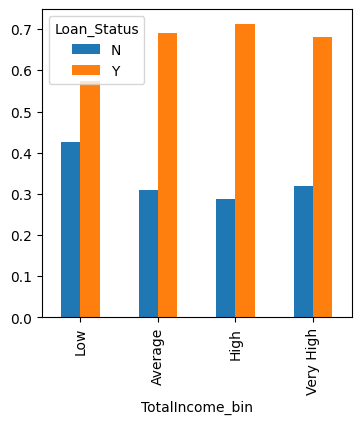

In [49]:
data["TotalIncome"] = data["ApplicantIncome"] + data["CoapplicantIncome"]

bins = [0,3000,5000,8000,81000]
group = ['Low','Average','High','Very High']
data["TotalIncome_bin"] = pd.cut(data["TotalIncome"],bins,labels=group)

vals_n = pd.crosstab(data["TotalIncome_bin"], data["Loan_Status"], normalize="index")
vals_n.plot(kind="bar",figsize=(4,4))

### Creating new Features: